In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
pd.set_option('display.max_columns', None)

In [2]:
jobData = pd.read_csv('cleaned_data_caa_15-Oct-11am.csv')

In [3]:
jobData.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,fraudulent,salary_lower_limit,salary_upper_limit,function_type_is_Accounting/Auditing,function_type_is_Administrative,function_type_is_Advertising,function_type_is_Art/Creative,function_type_is_Business Analyst,function_type_is_Business Development,function_type_is_Consulting,function_type_is_Customer Service,function_type_is_Data Analyst,function_type_is_Design,function_type_is_Distribution,function_type_is_Education,function_type_is_Engineering,function_type_is_Finance,function_type_is_Financial Analyst,function_type_is_General Business,function_type_is_Health Care Provider,function_type_is_Human Resources,function_type_is_Information Technology,function_type_is_Legal,function_type_is_Management,function_type_is_Manufacturing,function_type_is_Marketing,function_type_is_Not specified,function_type_is_Other,function_type_is_Product Management,function_type_is_Production,function_type_is_Project Management,function_type_is_Public Relations,function_type_is_Purchasing,function_type_is_Quality Assurance,function_type_is_Research,function_type_is_Sales,function_type_is_Science,function_type_is_Strategy/Planning,function_type_is_Supply Chain,function_type_is_Training,function_type_is_Writing/Editing,function,required_experience_is_Associate,required_experience_is_Director,required_experience_is_Entry level,required_experience_is_Executive,required_experience_is_Internship,required_experience_is_Mid-Senior level,required_experience_is_Not Applicable,required_experience_is_Not specified,required_experience,employment_type_is_Contract,employment_type_is_Full-time,employment_type_is_Not specified,employment_type_is_Other,employment_type_is_Part-time,employment_type_is_Temporary,employment_type,required_education_is_Associate Degree,required_education_is_Bachelor's Degree,required_education_is_Certification,required_education_is_Doctorate,required_education_is_High School or equivalent,required_education_is_Master's Degree,required_education_is_Not specified,required_education_is_Professional,required_education_is_Some College Coursework Completed,required_education_is_Some High School Coursework,required_education_is_Unspecified,required_education_is_Vocational,required_education_is_Vocational - Degree,required_education_is_Vocational - HS Diploma,required_education,industry_Accounting,industry_Airlines/Aviation,industry_Alternative Dispute Resolution,industry_Animation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Business Supplies and Equipment,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Fund-Raising,industry_Furniture,industry_Gambling & Casinos,industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Individual & Family Services,industry_Industrial Automation,industry_Information S

In [4]:
jobData2 = jobData.copy()
to_drop = ['job_id', 'location', 'title', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'lemmatized_documents', 'country_code', 'function', 'required_experience', 'employment_type', 'required_education', 'industry']
jobData2.drop(to_drop, axis = 1, inplace = True)
jobData2.head()

,telecommuting,has_company_logo,has_questions,fraudulent,salary_lower_limit,salary_upper_limit,function_type_is_Accounting/Auditing,function_type_is_Administrative,function_type_is_Advertising,function_type_is_Art/Creative,function_type_is_Business Analyst,function_type_is_Business Development,function_type_is_Consulting,function_type_is_Customer Service,function_type_is_Data Analyst,function_type_is_Design,function_type_is_Distribution,function_type_is_Education,function_type_is_Engineering,function_type_is_Finance,function_type_is_Financial Analyst,function_type_is_General Business,function_type_is_Health Care Provider,function_type_is_Human Resources,function_type_is_Information Technology,function_type_is_Legal,function_type_is_Management,function_type_is_Manufacturing,function_type_is_Marketing,function_type_is_Not specified,function_type_is_Other,function_type_is_Product Management,function_type_is_Production,function_type_is_Project Management,function_type_is_Public Relations,function_type_is_Purchasing,function_type_is_Quality Assurance,function_type_is_Research,function_type_is_Sales,function_type_is_Science,function_type_is_Strategy/Planning,function_type_is_Supply Chain,function_type_is_Training,function_type_is_Writing/Editing,required_experience_is_Associate,required_experience_is_Director,required_experience_is_Entry level,required_experience_is_Executive,required_experience_is_Internship,required_experience_is_Mid-Senior level,required_experience_is_Not Applicable,required_experience_is_Not specified,employment_type_is_Contract,employment_type_is_Full-time,employment_type_is_Not specified,employment_type_is_Other,employment_type_is_Part-time,employment_type_is_Temporary,required_education_is_Associate Degree,required_education_is_Bachelor's Degree,required_education_is_Certification,required_education_is_Doctorate,required_education_is_High School or equivalent,required_education_is_Master's Degree,required_education_is_Not specified,required_education_is_Professional,required_education_is_Some College Coursework Completed,required_education_is_Some High School Coursework,required_education_is_Unspecified,required_education_is_Vocational,required_education_is_Vocational - Degree,required_education_is_Vocational - HS Diploma,industry_Accounting,industry_Airlines/Aviation,industry_Alternative Dispute Resolution,industry_Animation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Business Supplies and Equipment,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Fund-Raising,industry_Furniture,industry_Gambling & Casinos,industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Individual & Family Services,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Trade and Development,industry_Internet,industry_Investment Banki

In [5]:
# Sklearn libraries
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [6]:
target = jobData2['fraudulent']
features = jobData2.drop('fraudulent', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.1, stratify = target, random_state=42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(16092, 295)
(16092,)
(1788, 295)
(1788,)


In [7]:
log_reg = LogisticRegression()
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
penalty_options = ['l2']

param_grid = dict(C = c_values, penalty = penalty_options)

In [8]:
grid = GridSearchCV(log_reg, param_grid = param_grid, cv = 10, n_jobs = -1, verbose=1)

In [9]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l2']},
             verbose=1)

In [10]:
grid.best_score_

0.9507832881037949

In [11]:
grid.best_params_

{'C': 0.0001, 'penalty': 'l2'}

Accuracy:	 0.9489808600546855
F1 score:	 0.004848484848484848


<AxesSubplot:>

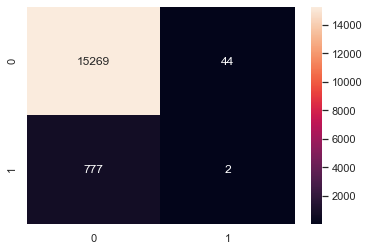

In [12]:
logreg_pred = grid.predict(X_train)

print("Accuracy:\t", grid.score(X_train, y_train))
print("F1 score:\t", f1_score(y_train, logreg_pred))
sb.heatmap(confusion_matrix(y_train, logreg_pred), annot=True, fmt='d')

Accuracy:	 0.9474272930648769
F1 score:	 0.0


<AxesSubplot:>

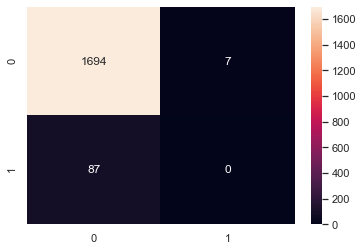

In [13]:
logreg_test = grid.predict(X_test)

print("Accuracy:\t", grid.score(X_test, y_test))
print("F1 score:\t", f1_score(y_test, logreg_test))
sb.heatmap(confusion_matrix(y_test, logreg_test), annot=True, fmt='d')